# This notebook is to draw and redraw experiments


### experiment with deltas

In [1]:
%load_ext autoreload
%autoreload 2

To draw the result of the experiment, the first cell is executed, in which the desired `exp_name` is selected. Beautiful names for algorithms are selected in the cell below. And there, algorithms are selected that will not be displayed in the cell. For each algorithm from `agent_name_old` there is a beautiful name in `agent_names_pretty'. And `ignore` contains the names of algorithms that are not displayed on the graph.

In [2]:
import json

# exp_name = "delta_light"
exp_name = "delta_heavy"
filename = f"{exp_name}.json"
with open(filename, "r") as f:
    data = json.load(f)

agent_names_old = data['0.0'].keys()

print(f"algorithm names: {agent_names_old}")

algorithm names: dict_keys(['SGD-UCB 0.1', 'SGD-UCB-Median 0.1', 'SGD-UCB-SMoM 0.1', 'RUCB', 'APE', 'APE +0.25', 'APE 2', 'Heavy-Inf'])


In [3]:
"""
for light tail
"""

if exp_name == "delta_light":
    agent_names_pretty = [
            "UCB",
            "UCB c=1.0",
            "SGD-UCB",
            "SGD-UCB 0.2",
            "SGD-UCB-Median",
            "SGD-UCB-Median",
            "SGD-UCB-SMoM",
            "SGD-UCB-SMoM",
            "RUCB",
            # "APE",
            # r"APE $p = 1.25 + \alpha$",
            # r"APE, $p = 2$",
            # "Heavy-Inf"
    ]

    ignore = [
            # "UCB c=0.1",
            "UCB 1.0",
            "SGD-UCB 0.1",
            # "SGD-UCB 0.2",
            "SGD-UCB-Median 0.1",
            # "SGD-UCB-Median 0.2",
            "SGD-UCB-SMoM 0.1",
            # "SGD-UCB-SMoM 0.2",
            # "RUCB",
            # "APE",
            # "APE +0.25",
            # "APE 2",
            # "Heavy-Inf"
    ]
    
elif exp_name == "delta_heavy":
    """
    for heavy tail
    """
    ['SGD-UCB 0.1', 'SGD-UCB-Median 0.1', 'SGD-UCB-SMoM 0.1', 'RUCB', 'APE', 'APE +0.25', 'APE 2', 'Heavy-Inf']
    agent_names_pretty = [
            "SGD-UCB",
            "SGD-UCB-Median",
            "SGD-UCB-SMoM",
            "RUCB",
            "APE",
            r"APE $p = 1.25 + \alpha$",
            r"APE, $p = 2$",
            "Heavy-Inf"
    ]

    ignore = [
            # "UCB c=0.1",
            # "UCB c=1.0",
            # "SGD-UCB 0.1",
            # "SGD-UCB 0.2",
            # "SGD-UCB-Median 0.1",
            # "SGD-UCB-Median 0.2",
            # "SGD-UCB-SMoM 0.1",
            # "SGD-UCB-SMoM 0.2",
            # "RUCB",
            "APE",
            # "APE +0.25",
            # "APE 2",
            "Heavy-Inf"
    ]
else:
    raise ValueError("there is no such experiment")

assert len(agent_names_pretty) == len(agent_names_old)

assert set(ignore) <= set(agent_names_old)

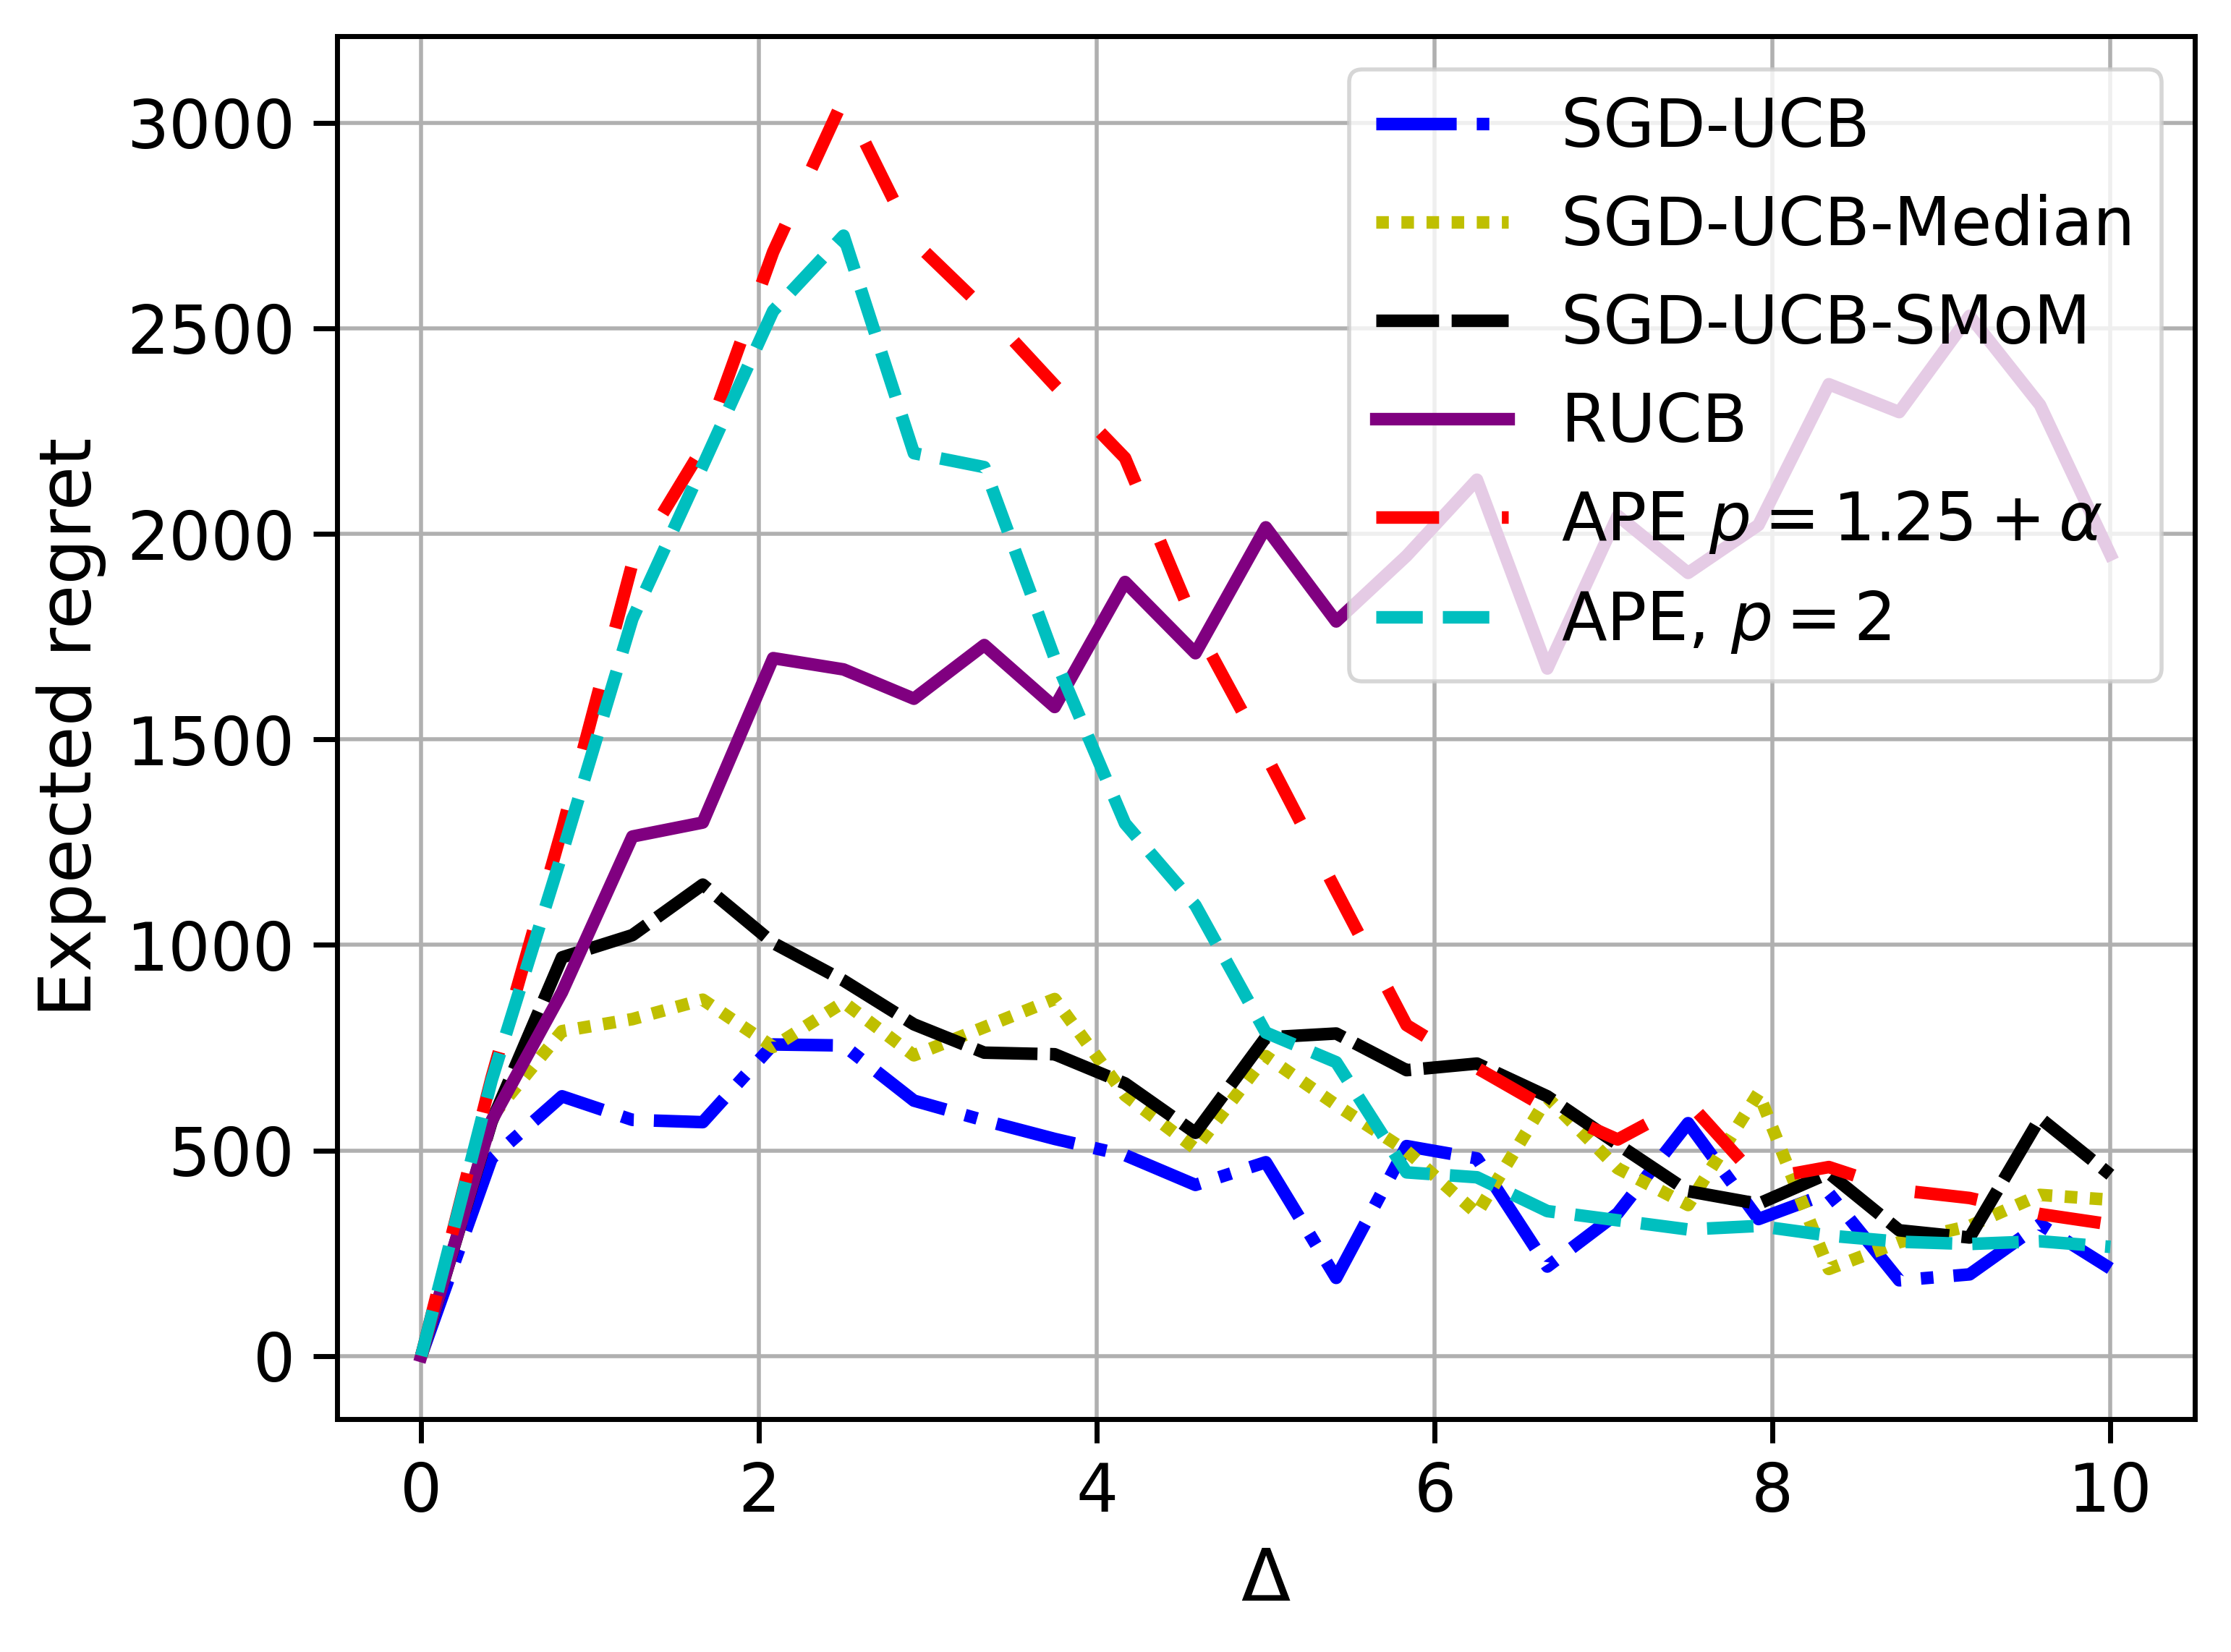

In [6]:
from experiment_helpers import delta_tail_draw
from experiment_helpers import drawer
from pathlib import Path

fig = delta_tail_draw.draw(filename, agent_names_pretty, ignore)

drawer.savefig(fig, Path("./"), exp_name)

### runtime comparison

In [5]:
import json

fname = "runtime_comp.json"

with open(fname, "r") as f:
    res = json.load(f)


import pandas as pd
import numpy as np
columns = ["Algorithms", r"Runtime for $RT /T = 0.1$, ms.",
           r"$\#$ fails",
           r"Runtime for $RT /T = 0.05$, ms.",
           r"$\#$ fails ",]

strs = []
for alg, rez in res.items():
    tmp = ["\texttt{"+ alg+"}"]
    for i in range(2):
        if len(rez['thresholds_times'][i]) == 0:
            res_time = None
        else:
            res_time = f"{(float(np.quantile(rez['thresholds_times'][i], 0.9)*1000)//1)/10}"
        tmp.append(res_time)
        tmp.append(f"{rez['num_failures'][i]}")
    # rez['thresholds_times'][i]
    strs.append(tmp)

df = pd.DataFrame(strs, columns=columns)#.iloc[[0,1,2,3, 6]]
df.to_latex("runtimes_table.txt")
df


FileNotFoundError: [Errno 2] No such file or directory: 'runtime_comp.json'

### many arms runtime comparison

In [60]:
import json

fname = "m_arm_runtime.json"

with open(fname, "r") as f:
    res = json.load(f)


import pandas as pd
import numpy as np
columns = ["Algorithms", r"T, $\#$ steps", r"$\#$ arms", "Runtime, s."]

strs = []
for T, rez in res.items():
    for n_arms, rez2 in rez.items():
        for alg_name, runtime in rez2.items():
            tmp = ["\texttt{"+ alg_name+"}", int(T), int(n_arms), float(runtime)]
            strs.append(tmp)

df = pd.DataFrame(strs, columns=columns)#.iloc[[0,1,2,3, 6]]
df.to_latex("runtimes_table.txt")
df


,Algorithms,"T, $\#$ steps",$\#$ arms,"Runtime, s."
0,\texttt{RUCB},5000,10,3.958370
1,\texttt{SGD-UCB 0.1},5000,10,0.568743
2,\texttt{SGD-UCB-Median 0.1},5000,10,0.387866
3,\texttt{SGD-UCB-SMoM 0.1},5000,10,0.199472
4,\texttt{RUCB},5000,1000,60.153227
5,\texttt{SGD-UCB 0.1},5000,1000,0.698792
6,\texttt{SGD-UCB-Median 0.1},5000,1000,0.331872
7,\texttt{SGD-UCB-SMoM 0.1},5000,1000,0.180485
8,\texttt{RUCB},5000,5000,0.009308
9,\texttt{SGD-UCB 0.1},5000,5000,0.039445


Text(0, 0.5, 'time, s.')

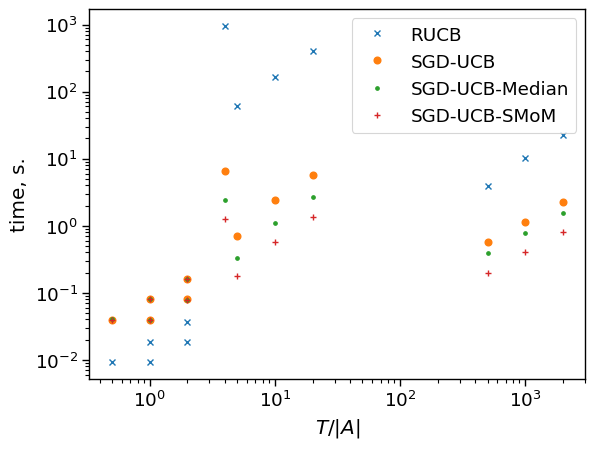

In [89]:
import matplotlib.pyplot as plt

df['div'] = (df.iloc[:,1]/df.iloc[:,2])
# y = df.iloc[:,3]

# plt.plot(x, y, ".")
names = ['RUCB', "SGD-UCB", 'SGD-UCB-Median','SGD-UCB-SMoM',]
tags = ["x", 'o', '.', "+"]
for tag, name, elem in zip(tags, names, df.groupby("Algorithms")):
    # name = elem[0]
    x = elem[1]['div']
    y = elem[1]['Runtime, s.']
    plt.plot(x, y, tag, label = name)
plt.legend()
plt.yscale("log")
plt.xscale("log")
plt.xlabel(r"$T/|A|$")
plt.ylabel("time, s.")

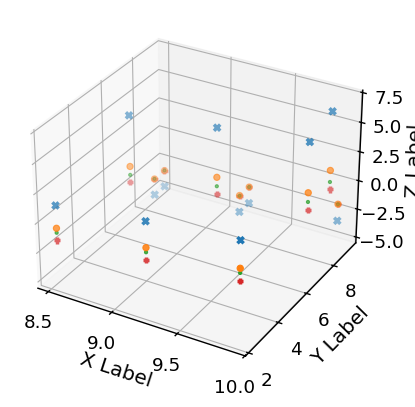

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Создание 3D-графика
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Построение графика
names = ['RUCB', "SGD-UCB", 'SGD-UCB-Median','SGD-UCB-SMoM',]
tags = ["x", 'o', '.', "+"]
for tag, name, elem in zip(tags, names, df.groupby("Algorithms")):
    # name = elem[0]
    x = np.log(elem[1].iloc[:, 1])
    y = np.log(elem[1].iloc[:, 2])
    z = np.log(elem[1]['Runtime, s.'])
    ax.scatter(x, y, z, marker=tag, label = name)  # 3D-точки
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Отображение графика
plt.show()

### environments with different noises

In [5]:
import json
from experiment_helpers import drawer
from pathlib import Path
import os
import matplotlib.pyplot as plt

exp_path = Path("experiments")
exp_name = "EXP_NAME"
figures_path = Path("figures")

if not figures_path.exists():
    os.mkdir(figures_path)
for rew_type in range(2):
    for env_type in range(1):
        run_name = f"{exp_name}__reward_{rew_type}_env_{env_type}"
                
        with open(exp_path/run_name/"rez.json", 'r') as f:
            rrez = json.load(f)
        print(rrez.keys())
        alg_names = [
            # 'UCB 0.1',
        #     # 'UCB 1.0',
        #     'SGD-UCB 0.1',
        #     # 'SGD-UCB 0.2',
        #     'SGD-UCB-Median 0.1',
        #     # 'SGD-UCB-Median 0.2',
        #     'SGD-UCB-SMoM 0.1',
        #     # 'SGD-UCB-SMoM 0.2',
        #     'RUCB-Median',
        #     'APE +0.25',
        #     'APE 2'
        ]
        alg_legend_names = [
            'UCB',
        #     # 'UCB 1.0',
        #     'SGD-UCB',
        #     # 'SGD-UCB 0.2',
        #     'SGD-UCB-Median',
        #     # 'SGD-UCB-Median 0.2',
        #     'SGD-UCB-SMoM',
        #     # 'SGD-UCB-SMoM 0.2',
        #     'RUCB-Median',
        #     r'APE, $p = 1.25 + \alpha$',
        #     r'APE, $p=2$'
        ]
        # print(rrez.keys())
        # rrez = {nice_name: rrez[name] for name, nice_name in zip(alg_names, alg_legend_names) if name in rrez.keys()}
        
        figs, _ = drawer.plot(rrez, with_legend = (rew_type == 0))
        
        fig_save_path = figures_path/run_name
        if not fig_save_path.exists():
            os.mkdir(fig_save_path)
        for name, fig in figs.items():
            drawer.savefig(fig, fig_save_path, name)
            plt.close(fig)

dict_keys(['UCB 0.1'])
dict_keys(['UCB 0.1'])


<Figure size 1700x800 with 0 Axes>

<Figure size 1700x800 with 0 Axes>

<Figure size 1700x800 with 0 Axes>

<Figure size 1700x800 with 0 Axes>

In [13]:
from numba.typed import List
from numba import float64

# Создание списка списков, все элементы которого являются typed.List
nested_list = List([List.empty_list(float64) for i in range(4)])

print(nested_list)

[[, ...], [, ...], [, ...], [, ...], ...]


In [17]:
nested_list[0].append(3)
nested_list[0]

ListType[float64]([3.0, 3.0, 3.0, 3.0, ...])